In [ ]:
!pip install opencv-python-headless easyocr torch


  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

In [ ]:
!pip install editdistance

In [ ]:
import torch
print(torch.cuda.is_available())  # Should return True if a GPU is available


False


# without GPU

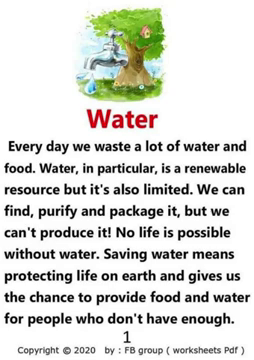

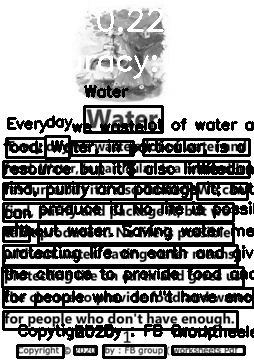

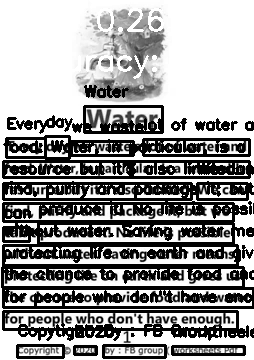

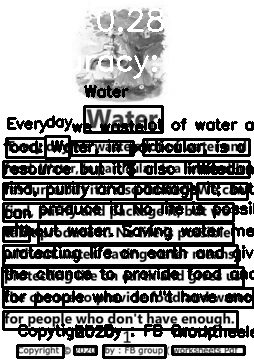

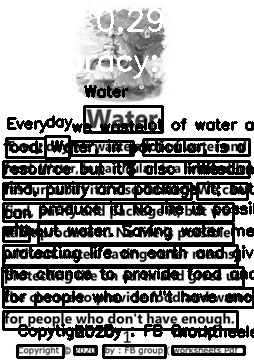

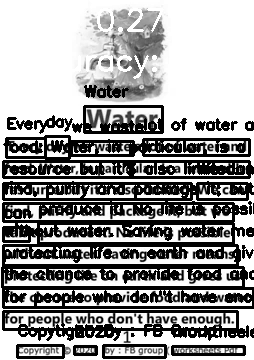

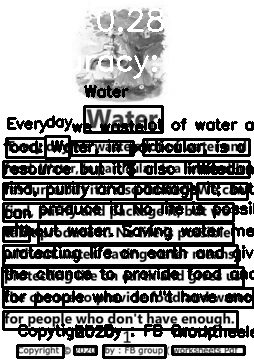

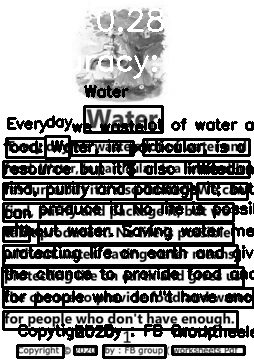

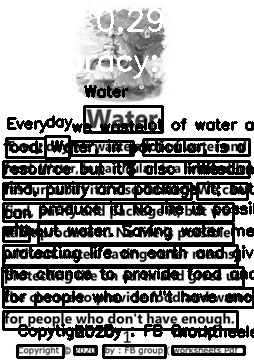

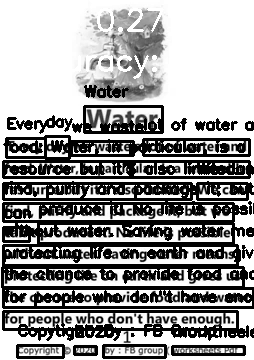

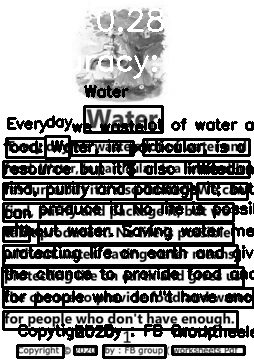

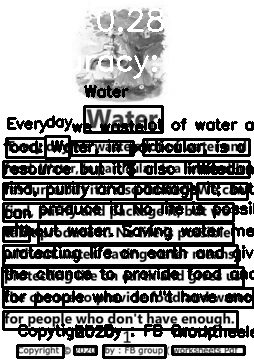

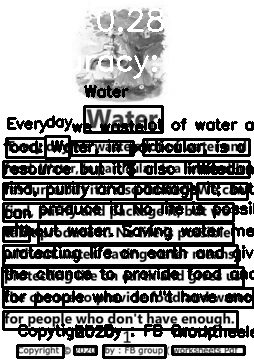

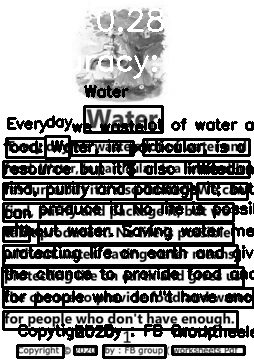

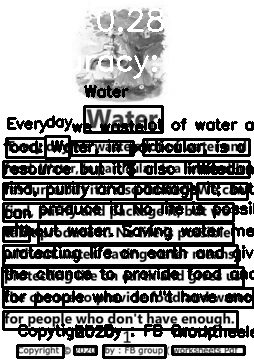

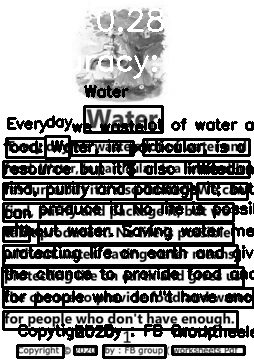

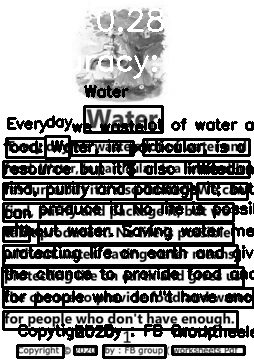

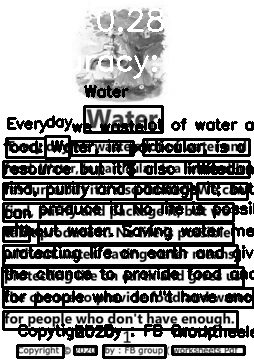

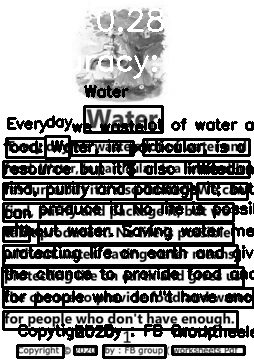

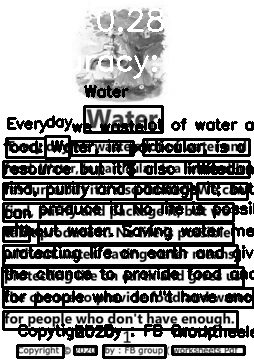

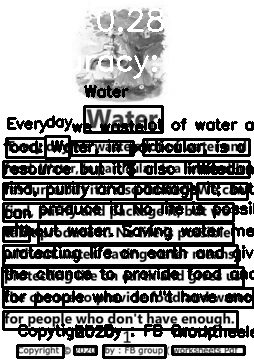

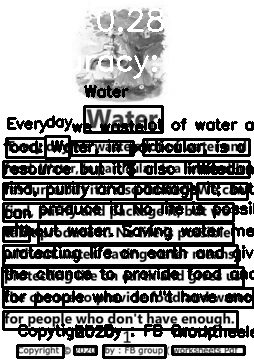

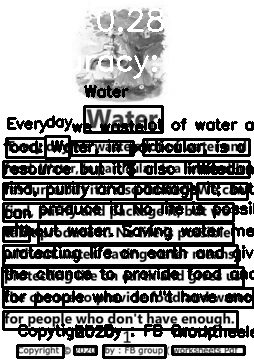

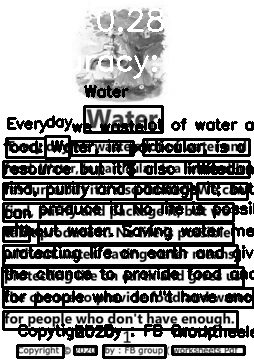

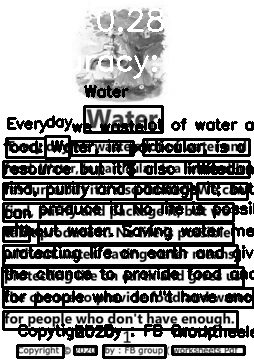

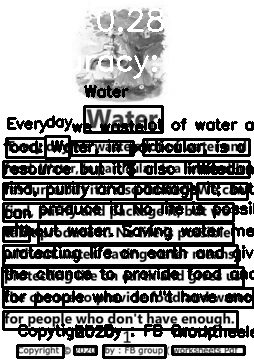

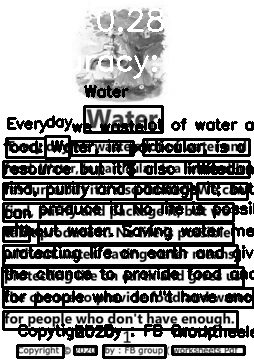

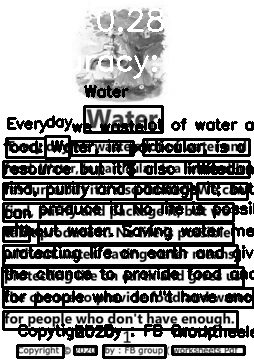

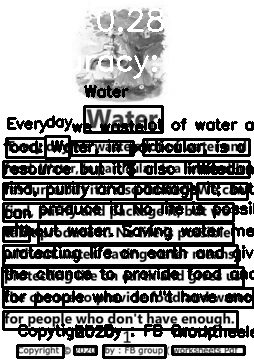

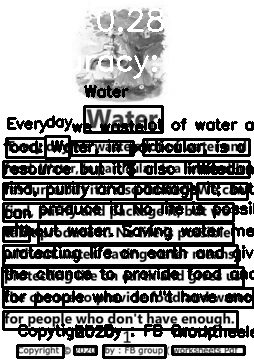

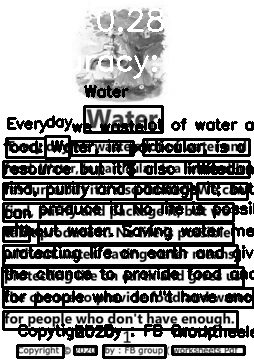

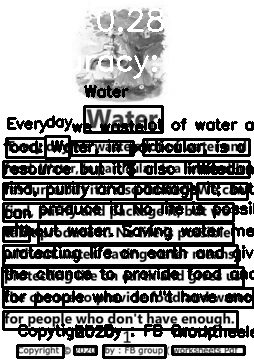

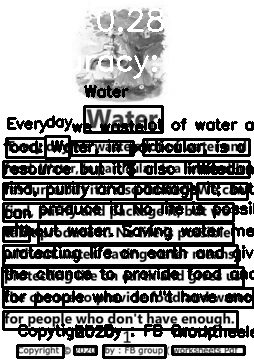

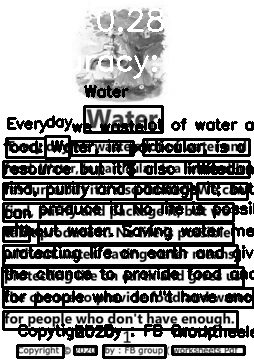

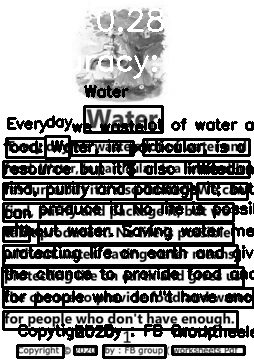

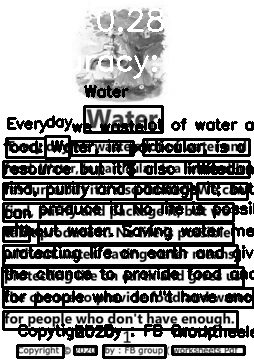

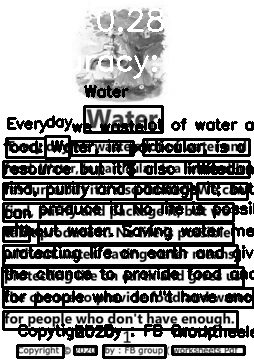

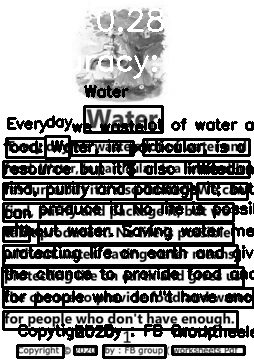

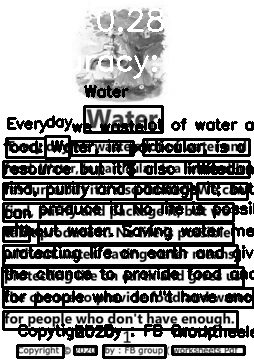

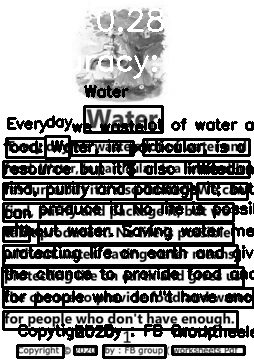

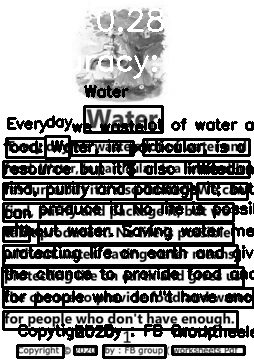

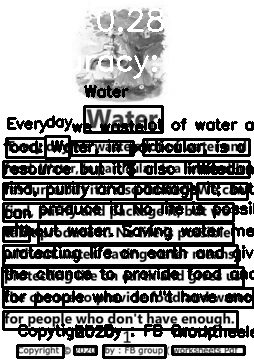

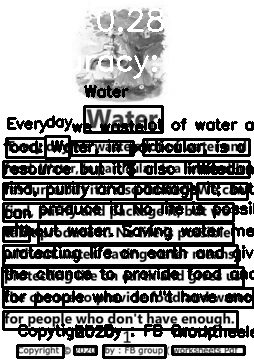

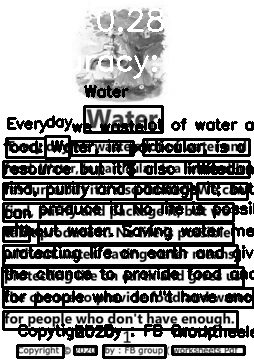

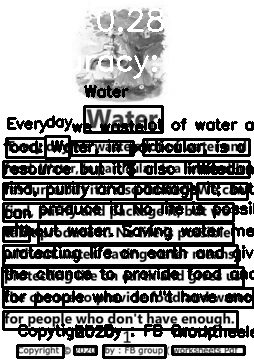

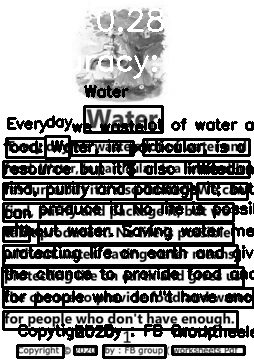

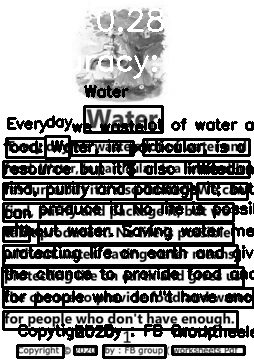

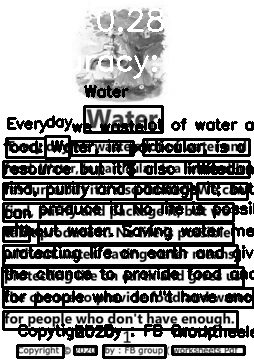

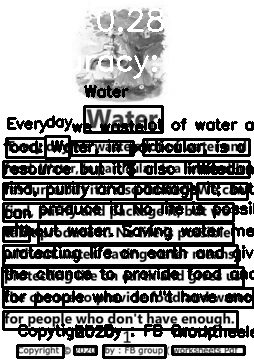

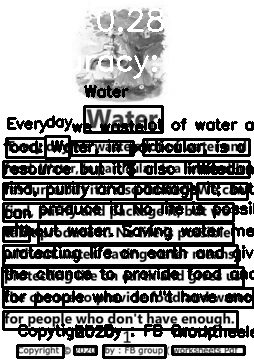

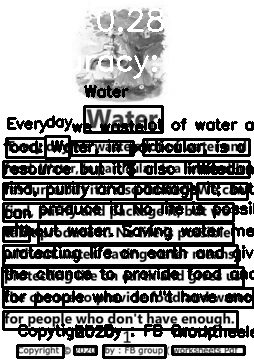

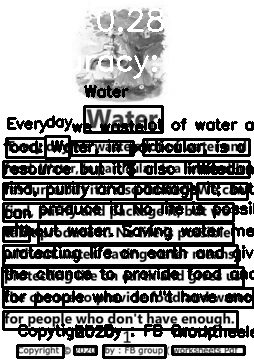

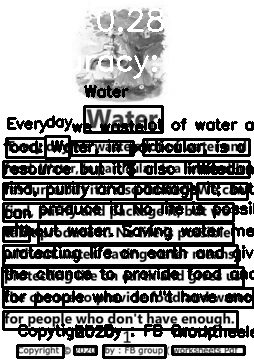

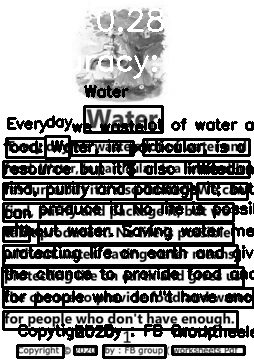

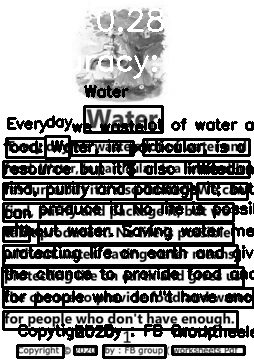

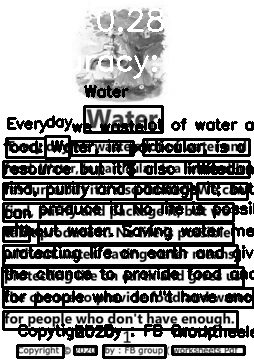

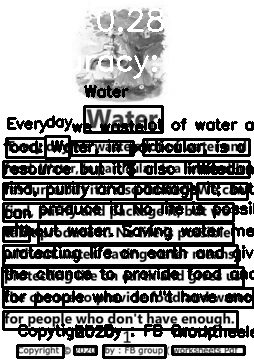

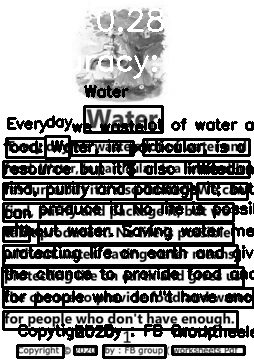

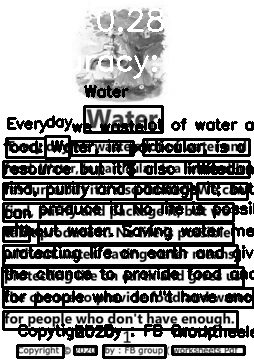

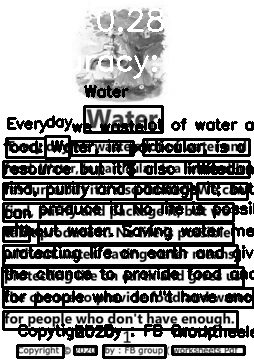

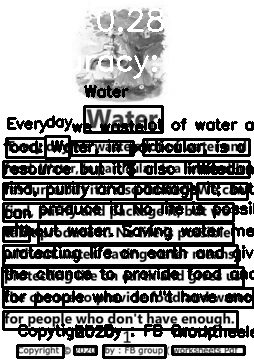

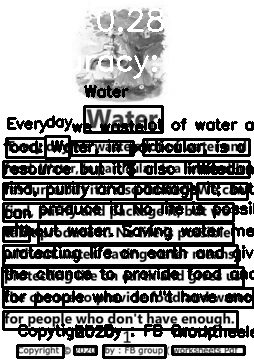

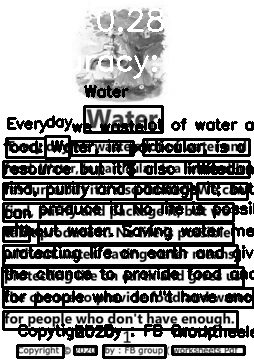

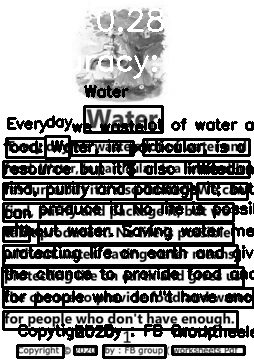

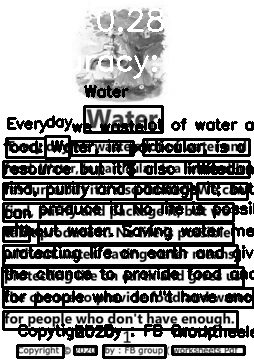

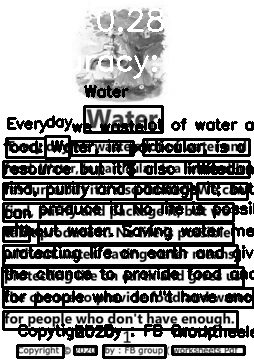

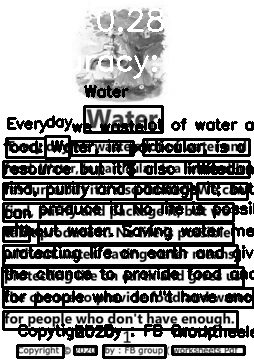

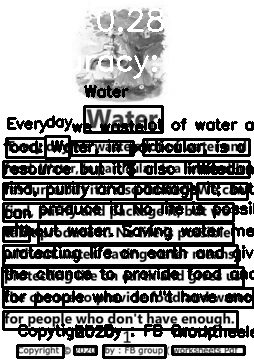

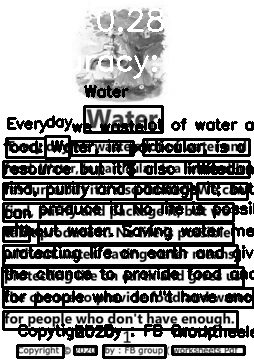

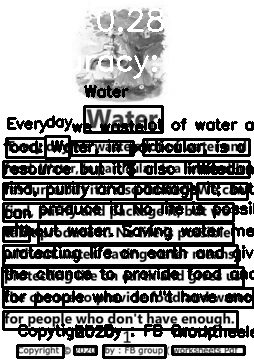

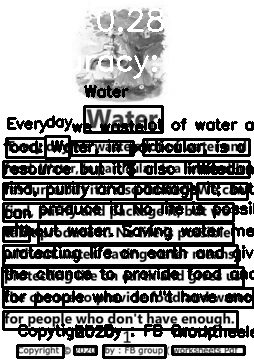

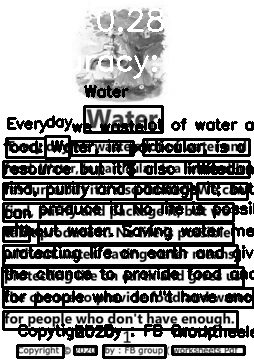

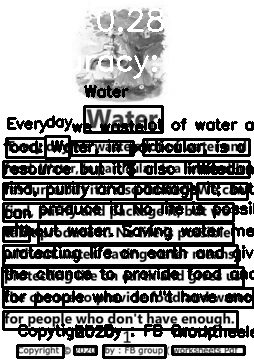

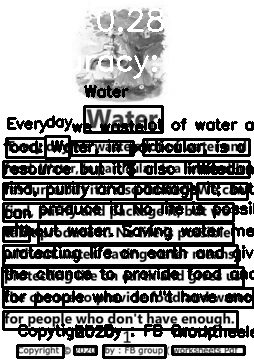

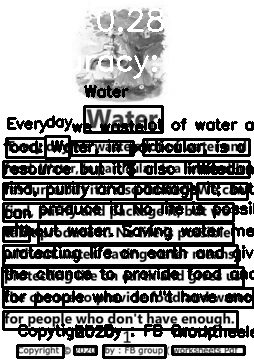

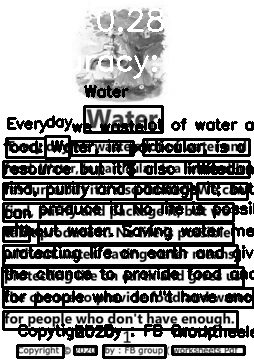

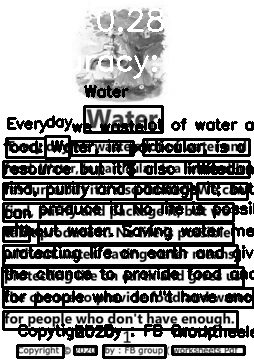

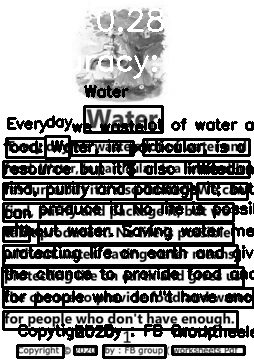

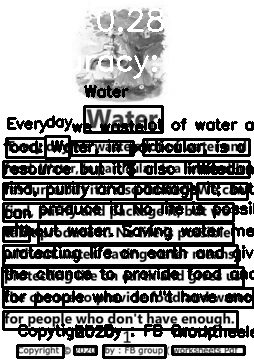

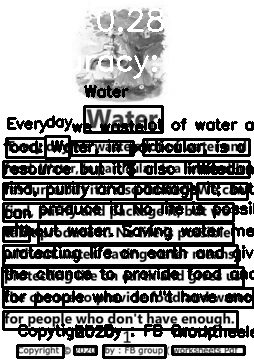

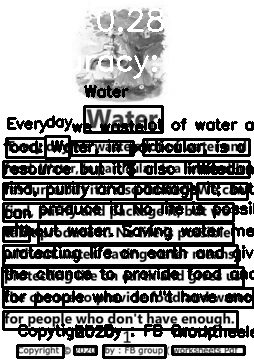

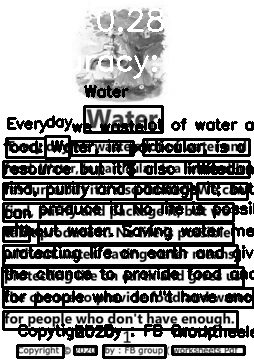

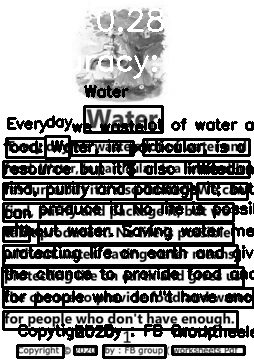

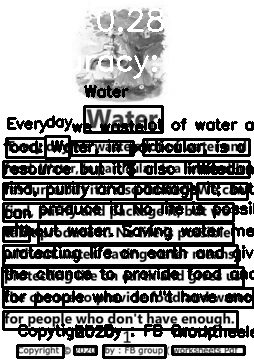

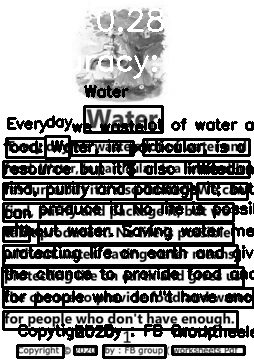

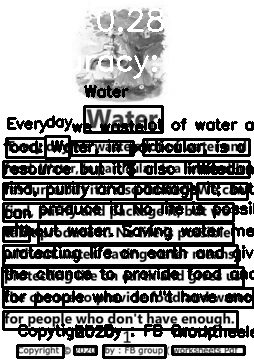

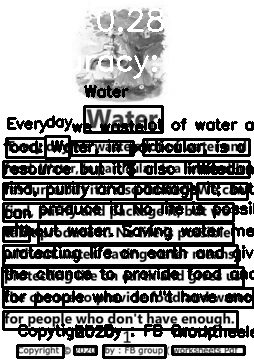

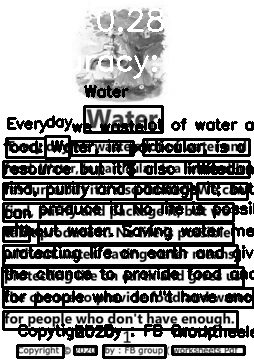

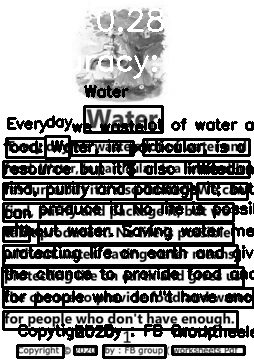

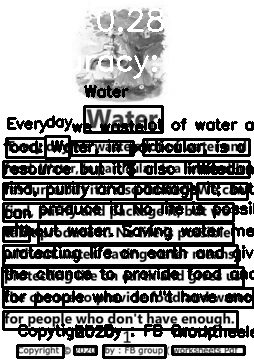

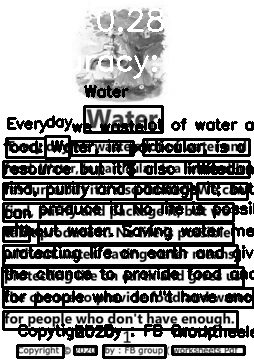

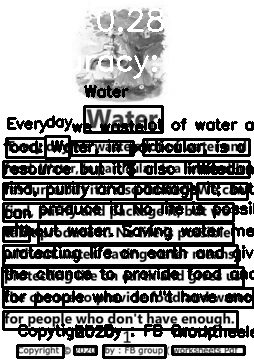

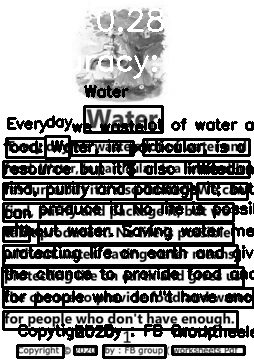

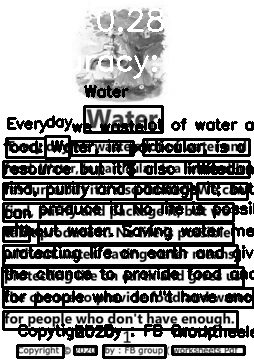

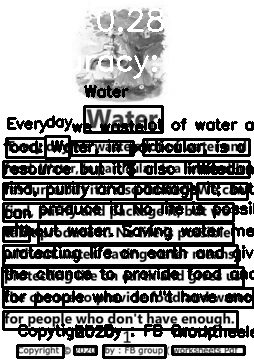

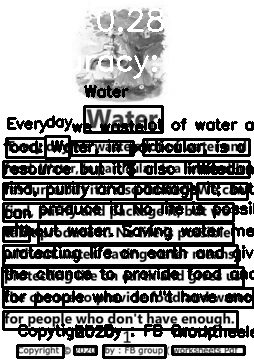

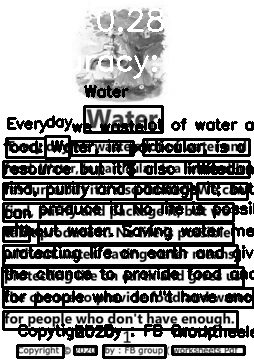

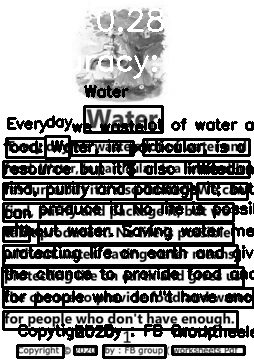

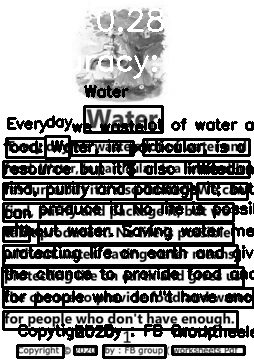

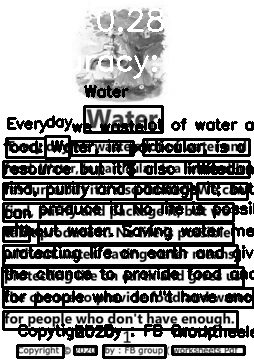

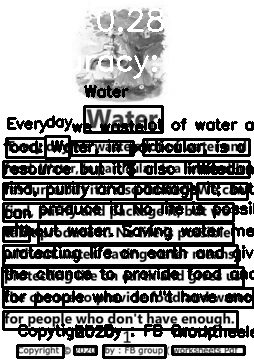

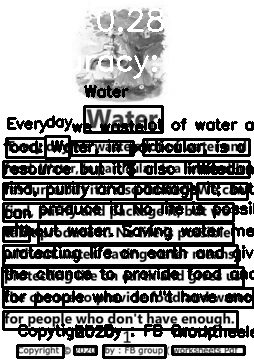

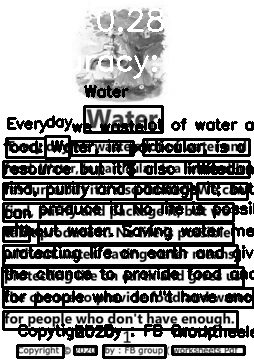

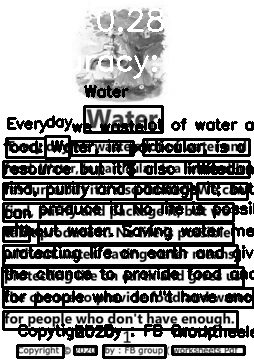

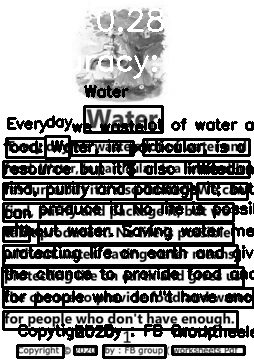

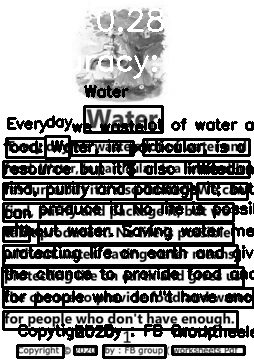

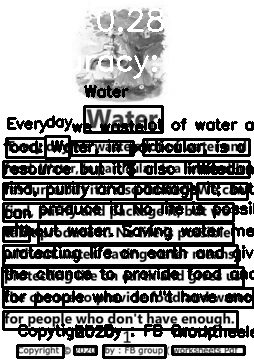

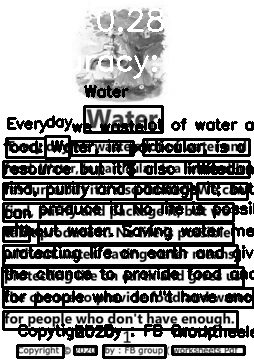

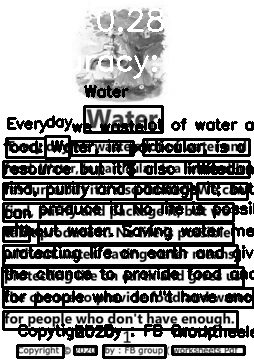

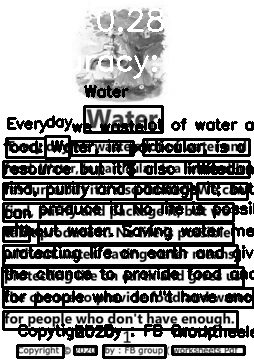

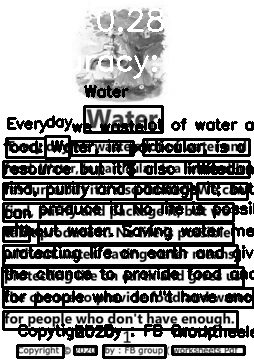

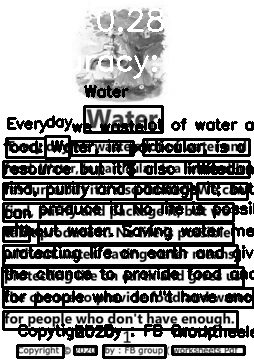

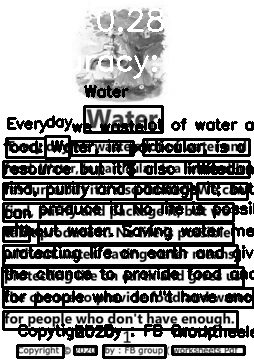

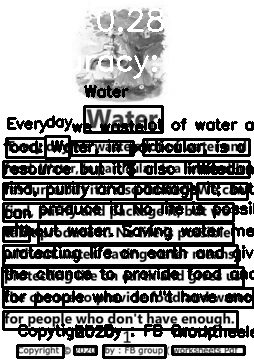

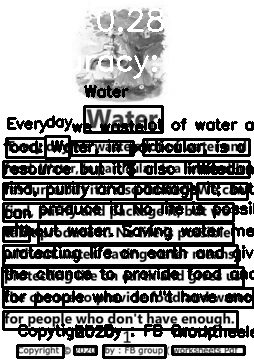

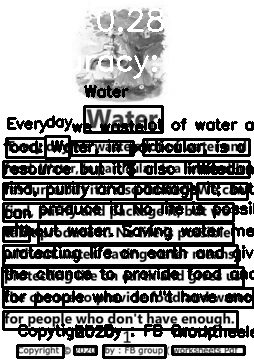

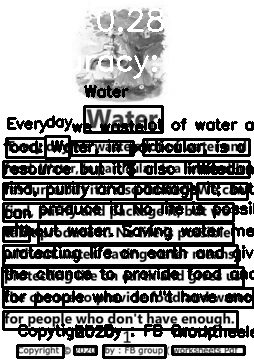

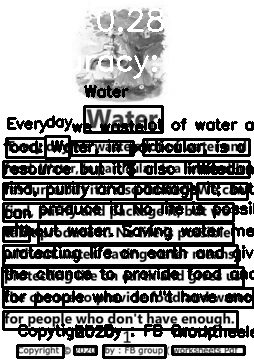

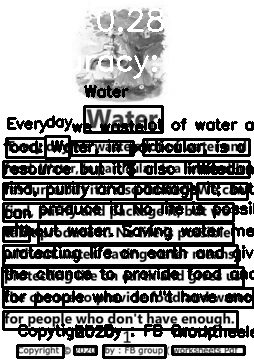

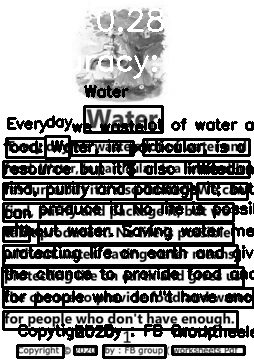

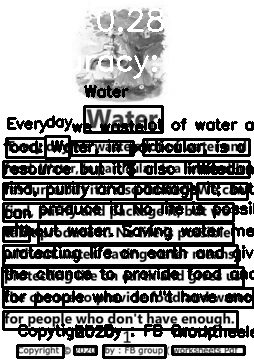

Total Processing Time: 427.61293148994446 seconds
Frames Per Second (FPS): 0.2806276217650398
CPU Usage: 61.1%
RAM Usage: 16.1%


In [ ]:
import cv2
import easyocr
import time
import psutil
import editdistance
from google.colab.patches import cv2_imshow

reader = easyocr.Reader(['en'], gpu=False)

def extract_frames(video_path, target_fps=30):
    cap = cv2.VideoCapture(video_path)
    fps = cap.get(cv2.CAP_PROP_FPS)
    frame_interval = int(fps // target_fps)
    frames = []
    frame_count = 0

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        if frame_count % frame_interval == 0:
            frames.append(frame)
        frame_count += 1

    cap.release()
    return frames

def convert_to_grayscale(frames):
    grayscale_frames = []
    for frame in frames:
        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        grayscale_frames.append(gray_frame)
    return grayscale_frames

def apply_ocr_on_frames(frames, reference_text):
    ocr_results = []
    total_time = 0
    frame_count = 0

    for i, frame in enumerate(frames):
        if i < 30:
            continue

        start_time = time.time()
        result = reader.readtext(frame)
        end_time = time.time()
        elapsed_time = end_time - start_time
        total_time += elapsed_time
        frame_count += 1

        ocr_results.append(result)

        for (bbox, text, prob) in result:
            (top_left, top_right, bottom_right, bottom_left) = bbox
            top_left = tuple([int(coord) for coord in top_left])
            bottom_right = tuple([int(coord) for coord in bottom_right])

            cv2.rectangle(frame, top_left, bottom_right, (0, 255, 0), 2)
            cv2.putText(frame, text, (top_left[0], top_left[1] - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

        fps = frame_count / total_time if total_time > 0 else 0
        cer_value = calculate_cer(reference_text, result)
        accuracy_based_on_cer = 100 - cer_value

        cv2.putText(frame, f"FPS: {fps:.2f}", (10, 30),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)
        cv2.putText(frame, f"Accuracy: {accuracy_based_on_cer:.2f}%", (10, 70),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)

        cv2_imshow(frame)

    return {
        "total_time": total_time,
        "fps": frame_count / total_time if total_time > 0 else 0,
        "ocr_results": ocr_results
    }

def get_resource_utilization():
    cpu_usage = psutil.cpu_percent(interval=1)
    memory_info = psutil.virtual_memory()
    return {
        "cpu_usage": cpu_usage,
        "ram_usage": memory_info.percent
    }

def calculate_cer(reference_text, ocr_output):
    ocr_text = " ".join([text for _, text, _ in ocr_output])
    reference_text = ' '.join(reference_text.split())
    ocr_text = ' '.join(ocr_text.split())
    distance = editdistance.eval(reference_text, ocr_text)
    cer = distance / len(reference_text) if len(reference_text) > 0 else 0
    return cer * 100

def main(video_path, reference_path):
    frames = extract_frames(video_path)
    cv2_imshow(frames[0])
    grayscale_frames = convert_to_grayscale(frames)

    with open(reference_path, 'r') as file:
        reference_text = file.read()

    performance_metrics = apply_ocr_on_frames(grayscale_frames, reference_text)
    resource_utilization = get_resource_utilization()

    print(f"Total Processing Time: {performance_metrics['total_time']} seconds")
    print(f"Frames Per Second (FPS): {performance_metrics['fps']}")
    print(f"CPU Usage: {resource_utilization['cpu_usage']}%")
    print(f"RAM Usage: {resource_utilization['ram_usage']}%")

video_path = '/content/drive/MyDrive/Classroom/test1.mp4'
reference_path = '/content/drive/MyDrive/Classroom/reference1.txt'
main(video_path, reference_path)


# with gpu


In [ ]:
!pip install opencv-python-headless easyocr torch editdistance

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

In [ ]:
import torch
print(torch.cuda.is_available())

True


Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

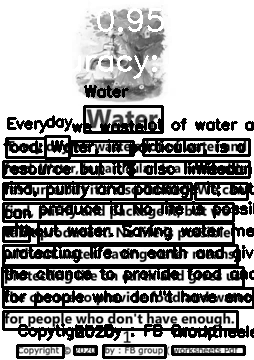

Total Processing Time: 35.6817352771759 seconds
Frames Per Second (FPS): 4.203831423410303
Character Error Rate (CER): 8.63%
OCR Accuracy Based on CER: 91.37%
CPU Usage: 2.0%
RAM Usage: 16.7%


In [ ]:
import cv2
import easyocr
import time
import psutil
import editdistance
from google.colab.patches import cv2_imshow

reader = easyocr.Reader(['en'], gpu=True)

def extract_frames(video_path, target_fps=30):
    cap = cv2.VideoCapture(video_path)
    fps = cap.get(cv2.CAP_PROP_FPS)
    frame_interval = int(fps // target_fps)
    frames = []
    frame_count = 0

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        if frame_count % frame_interval == 0:
            frames.append(frame)
        frame_count += 1

    cap.release()
    return frames

def convert_to_grayscale(frames):
    grayscale_frames = []
    for frame in frames:
        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        grayscale_frames.append(gray_frame)
    return grayscale_frames

def apply_ocr_on_frames(frames, reference_text):
    ocr_results = []
    total_time = 0
    frame_count = 0
    first_frame = None

    for i, frame in enumerate(frames):
        start_time = time.time()
        result = reader.readtext(frame)
        end_time = time.time()
        elapsed_time = end_time - start_time
        total_time += elapsed_time
        frame_count += 1

        ocr_results.append(result)

        if i == 0:  # Process only the first frame for display
            first_frame = frame.copy()
            for (bbox, text, prob) in result:
                (top_left, top_right, bottom_right, bottom_left) = bbox
                top_left = tuple([int(coord) for coord in top_left])
                bottom_right = tuple([int(coord) for coord in bottom_right])
                cv2.rectangle(first_frame, top_left, bottom_right, (0, 255, 0), 2)
                cv2.putText(first_frame, text, (top_left[0], top_left[1] - 10),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

            fps = frame_count / total_time if total_time > 0 else 0
            cer_value = calculate_cer(reference_text, result)
            accuracy_based_on_cer = 100 - cer_value

            cv2.putText(first_frame, f"FPS: {fps:.2f}", (10, 30),
                        cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)
            cv2.putText(first_frame, f"Accuracy: {accuracy_based_on_cer:.2f}%", (10, 70),
                        cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)

    return {
        "total_time": total_time,
        "fps": frame_count / total_time if total_time > 0 else 0,
        "ocr_results": ocr_results,
        "first_frame": first_frame
    }

def get_resource_utilization():
    cpu_usage = psutil.cpu_percent(interval=1)
    memory_info = psutil.virtual_memory()
    return {
        "cpu_usage": cpu_usage,
        "ram_usage": memory_info.percent
    }

def calculate_cer(reference_text, ocr_output):
    ocr_text = " ".join([text for _, text, _ in ocr_output])
    reference_text = ' '.join(reference_text.split())
    ocr_text = ' '.join(ocr_text.split())
    distance = editdistance.eval(reference_text, ocr_text)
    cer = distance / len(reference_text) if len(reference_text) > 0 else 0
    return cer * 100

def main(video_path, reference_path):
    frames = extract_frames(video_path)
    grayscale_frames = convert_to_grayscale(frames)

    with open(reference_path, 'r') as file:
        reference_text = file.read()

    performance_metrics = apply_ocr_on_frames(grayscale_frames, reference_text)
    resource_utilization = get_resource_utilization()

    if performance_metrics["first_frame"] is not None:
        cv2_imshow(performance_metrics["first_frame"])

    print(f"Total Processing Time: {performance_metrics['total_time']} seconds")
    print(f"Frames Per Second (FPS): {performance_metrics['fps']}")
    print(f"Character Error Rate (CER): {calculate_cer(reference_text, performance_metrics['ocr_results'][0]):.2f}%")
    print(f"OCR Accuracy Based on CER: {100 - calculate_cer(reference_text, performance_metrics['ocr_results'][0]):.2f}%")
    print(f"CPU Usage: {resource_utilization['cpu_usage']}%")
    print(f"RAM Usage: {resource_utilization['ram_usage']}%")

video_path = '/content/drive/MyDrive/Classroom/test1.mp4'
reference_path = '/content/drive/MyDrive/Classroom/reference1.txt'
main(video_path, reference_path)


# ON CPU With
- 1. Resolution Variation
- 2. Multithreading
- 3. skip similar frames

In [ ]:
!pip install opencv-python-headless easyocr torch editdistance

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

In [ ]:
import torch
print(torch.cuda.is_available())

False


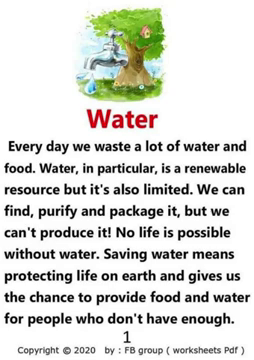

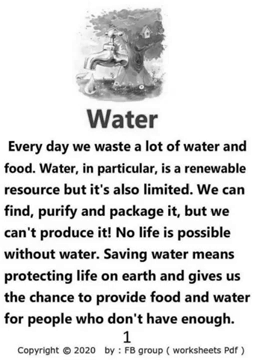

Total Processing Time: 3.5933635234832764 seconds
Frames Per Second (FPS): 41.743619597550605
Edit Distance: 47
Accuracy Based on Edit Distance: 88.16%
CPU Usage: 60.3%
RAM Usage: 24.6%


In [ ]:
import cv2
import easyocr
import time
import psutil
import numpy as np
import editdistance
from concurrent.futures import ThreadPoolExecutor
from google.colab.patches import cv2_imshow

reader = easyocr.Reader(['en'], gpu=False)

def reduce_resolution(frames, scale_percent=90):
    processed_frames = []
    for frame in frames:
        width = int(frame.shape[1] * scale_percent / 100)
        height = int(frame.shape[0] * scale_percent / 100)
        dim = (width, height)
        resized_frame = cv2.resize(frame, dim, interpolation=cv2.INTER_AREA)
        processed_frames.append(resized_frame)
    return processed_frames

def is_similar(frame1, frame2, threshold=3000):
    gray_frame1 = cv2.cvtColor(frame1, cv2.COLOR_BGR2GRAY)
    gray_frame2 = cv2.cvtColor(frame2, cv2.COLOR_BGR2GRAY)
    mse = np.sum((gray_frame1 - gray_frame2) ** 2)
    mse /= float(gray_frame1.shape[0] * gray_frame1.shape[1])
    return mse < threshold

def process_frame_with_ocr(frame):
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    result = reader.readtext(gray_frame)
    return result, gray_frame

def apply_ocr_optimized(frames):
    processed_frames = reduce_resolution(frames)
    ocr_results = []
    previous_frame = None

    with ThreadPoolExecutor(max_workers=4) as executor:
        for i in range(len(processed_frames)):
            if previous_frame is not None and is_similar(previous_frame, processed_frames[i]):
                continue
            result, gray_frame = executor.submit(process_frame_with_ocr, processed_frames[i]).result()
            ocr_results.append((result, gray_frame))
            previous_frame = processed_frames[i]

    return ocr_results

def calculate_editdistance(reference, ocr_output):
    ocr_texts = []
    for result, _ in ocr_output:
        for item in result:
            if isinstance(item, tuple) and len(item) == 3:
                _, text, _ = item
                ocr_texts.append(text)

    ocr_text = " ".join(ocr_texts)
    return editdistance.eval(reference, ocr_text), ocr_text

def main(video_path, reference_path):
    cap = cv2.VideoCapture(video_path)
    frames = []
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        frames.append(frame)
    cap.release()

    # Display a sample frame before processing
    sample_frame = frames[0]
    cv2_imshow(sample_frame)
    #cv2.imwrite('/content/sample_frame_before_ocr.jpg', sample_frame)

    start_time = time.time()
    ocr_results = apply_ocr_optimized(frames)
    end_time = time.time()

    total_time = end_time - start_time
    fps = len(frames) / total_time if total_time > 0 else 0

    with open(reference_path, 'r') as file:
        reference_text = file.read().strip()

    # Display a sample frame during OCR processing
    if ocr_results:
        ocr_sample_frame = ocr_results[0][1]  # First frame during OCR processing
        cv2_imshow(ocr_sample_frame)
        #cv2.imwrite('/content/sample_frame_during_ocr.jpg', ocr_sample_frame)

    # Calculate Edit Distance and Accuracy Based on Edit Distance
    edit_distance_value, ocr_text = calculate_editdistance(reference_text, ocr_results)
    accuracy_based_on_editdistance = (1 - (edit_distance_value / max(len(reference_text), len(ocr_text)))) * 100

    # Print results
    print(f"Total Processing Time: {total_time} seconds")
    print(f"Frames Per Second (FPS): {fps}")
    print(f"Edit Distance: {edit_distance_value}")
    print(f"Accuracy Based on Edit Distance: {accuracy_based_on_editdistance:.2f}%")
    print(f"CPU Usage: {psutil.cpu_percent()}%")
    print(f"RAM Usage: {psutil.virtual_memory().percent}%")

# Example Usage
video_path = '/content/drive/MyDrive/Classroom/test1.mp4'
reference_path = '/content/drive/MyDrive/Classroom/reference1.txt'
main(video_path, reference_path)


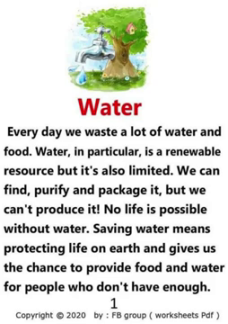

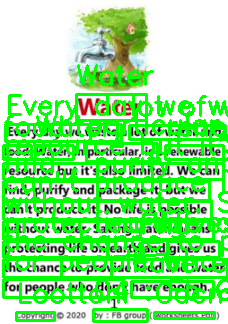

Total Processing Time: 4.2200329303741455 seconds
Frames Per Second (FPS): 35.54474632658876
Edit Distance: 79
Accuracy Based on Edit Distance: 80.10%
Extracted Text: Water Every day we waste Iot of water and food Water; particular, Is renewable resource but it'$ also limited: We can find , purify and package it, but we can"t produce itl No life is possible without water. Saving water means protecting life on gives us the chance to provide food and water for people who don' have enough: Loottohi 04 : Fb Gtoup Cacmttlenecin earth Fnd
Reference Text: Water

Every day we waste a lot of water and
food. Water, in particular, is a renewable
resource but it's also limited. We can
find, purify and package it, but we
can't produce it! No life is possible
without water. Saving water means
protecting life on earth and gives us
the chance to provide food and water

for people who don't have enough.
1

Copyright © 2020 by : FB group ( worksheets Pat )
CPU Usage: 25.6%
RAM Usage: 25.1%


In [ ]:
import cv2
import easyocr
import time
import psutil
import numpy as np
import editdistance
from concurrent.futures import ThreadPoolExecutor
from google.colab.patches import cv2_imshow  # Import cv2_imshow for Colab

reader = easyocr.Reader(['en'], gpu=False)

def reduce_resolution(frames, scale_percent=90):
    processed_frames = []
    for frame in frames:
        width = int(frame.shape[1] * scale_percent / 100)
        height = int(frame.shape[0] * scale_percent / 100)
        dim = (width, height)
        resized_frame = cv2.resize(frame, dim, interpolation=cv2.INTER_AREA)
        processed_frames.append(resized_frame)
    return processed_frames

def is_similar(frame1, frame2, threshold=3000):
    gray_frame1 = cv2.cvtColor(frame1, cv2.COLOR_BGR2GRAY)
    gray_frame2 = cv2.cvtColor(frame2, cv2.COLOR_BGR2GRAY)
    mse = np.sum((gray_frame1 - gray_frame2) ** 2)
    mse /= float(gray_frame1.shape[0] * gray_frame1.shape[1])
    return mse < threshold


def process_frame_with_ocr(frame):
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    results = reader.readtext(gray_frame)
    return results

def draw_boxes(frame, ocr_results):
    for bbox, text, _ in ocr_results:
        p1, p2, p3, p4 = bbox
        cv2.polylines(frame, [np.array([p1, p2, p3, p4], np.int32)], isClosed=True, color=(0, 255, 0), thickness=2)
        cv2.putText(frame, text, (int(p1[0]), int(p1[1] - 10)), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

def apply_ocr_optimized(frames):
    processed_frames = reduce_resolution(frames)

    # Show and save a sample frame after reducing resolution
    cv2_imshow(processed_frames[0])
    #cv2.imwrite('sample_reduced_resolution.jpg', processed_frames[0])

    ocr_results = []
    previous_frame = None

    with ThreadPoolExecutor(max_workers=4) as executor:  # Multi-threading
        for i in range(len(processed_frames)):
            if previous_frame is not None and is_similar(previous_frame, processed_frames[i]):
                continue  # Skip OCR if frames are similar
            result = executor.submit(process_frame_with_ocr, processed_frames[i]).result()
            ocr_results.append(result)
            previous_frame = processed_frames[i]

    return processed_frames, ocr_results

def calculate_editdistance(reference, ocr_output):
    ocr_texts = []
    for result in ocr_output:
        if len(result) == 3:  # Ensure there are three elements to unpack
            _, text, _ = result
            ocr_texts.append(text)
        elif len(result) == 1:  # Handle the case with only one element (unlikely but safe)
            ocr_texts.append(result[0])

    ocr_text = " ".join(ocr_texts)
    return editdistance.eval(reference, ocr_text), ocr_text

def main(video_path, reference_path):
    cap = cv2.VideoCapture(video_path)
    frames = []
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        frames.append(frame)
    cap.release()

    start_time = time.time()
    processed_frames, ocr_results = apply_ocr_optimized(frames)
    end_time = time.time()

    total_time = end_time - start_time
    fps = len(frames) / total_time if total_time > 0 else 0

    with open(reference_path, 'r') as file:
        reference_text = file.read().strip()

    # Calculate Edit Distance and Accuracy Based on Edit Distance
    edit_distance_value, extracted_text = calculate_editdistance(reference_text, [item for sublist in ocr_results for item in sublist])
    accuracy_based_on_editdistance = (1 - (edit_distance_value / max(len(reference_text), len(extracted_text)))) * 100

    # Show sample frame with OCR bounding boxes
    sample_frame = processed_frames[0]
    draw_boxes(sample_frame, ocr_results[0])
    cv2_imshow(sample_frame)
    #cv2.imwrite('sample_with_ocr_boxes.jpg', sample_frame)

    # Print results
    print(f"Total Processing Time: {total_time} seconds")
    print(f"Frames Per Second (FPS): {fps}")
    print(f"Edit Distance: {edit_distance_value}")
    print(f"Accuracy Based on Edit Distance: {accuracy_based_on_editdistance:.2f}%")
    print(f"Extracted Text: {extracted_text}")
    print(f"Reference Text: {reference_text}")
    print(f"CPU Usage: {psutil.cpu_percent()}%")
    print(f"RAM Usage: {psutil.virtual_memory().percent}%")

# Example Usage
video_path = '/content/drive/MyDrive/Classroom/test1.mp4'
reference_path = '/content/drive/MyDrive/Classroom/reference1.txt'
main(video_path, reference_path)
